# 📘 Pathfinding Algorithms: BFS vs DFS

Pathfinding is a fundamental concept in computer science, often used in AI, game development, and robotics. Two of the most basic and widely-used graph traversal algorithms are:

1. **BFS** (Breadth-First Search)  
2. **DFS** (Depth-First Search)

Both algorithms can be used to search through **graphs or grids** to find a path from a **start node** to a **goal node**.

---

## 🔍 Depth-First Search (DFS)

**Idea**: Explore as far as possible along each branch before backtracking.

### How it works:
1. Start from the initial node.  
2. Recursively visit an unvisited neighbor.  
3. If you reach a dead end, backtrack to the previous node and try a different path.

### Data Structure Used:
- **Stack (LIFO)** — usually handled implicitly via recursion.

### Pros:
- Simple to implement  
- Uses less memory than BFS in many cases

### Cons:
- Might get stuck going deep in the wrong direction  
- Not guaranteed to find the shortest path

---

## 🔍 Breadth-First Search (BFS)

**Idea**: Explore all neighbors at the current depth before moving to the next level.

### How it works:
1. Start from the initial node.  
2. Visit all direct neighbors.  
3. Then visit the neighbors’ neighbors (level by level).

### Data Structure Used:
- **Queue (FIFO)**

### Pros:
- Guaranteed to find the shortest path in an unweighted graph  
- Systematic and complete

### Cons:
- Can consume a lot of memory

---

> ✨ **Tip:** Use **BFS** when you need the **shortest path**. Use **DFS** when memory is limited or you're exploring deeply nested paths.


In [83]:
from collections import deque

def bfs(graph, start, target):
    visited = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node == target:
            return True
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                queue.append(neighbor)
    return False

def dfs(graph, start, target):
    visited = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node == target:
            return True
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    stack.append(neighbor)
    return False


## 🧩 Example Graph Representation

We can represent a graph using  **Python dictionary** (also called an adjacency list):

```python
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': ['I'],
    'E': ['I'],
    'F': ['G'],
    'I': ['G'],
    'G': []
}

/tmp/ipykernel_11948/271958186.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


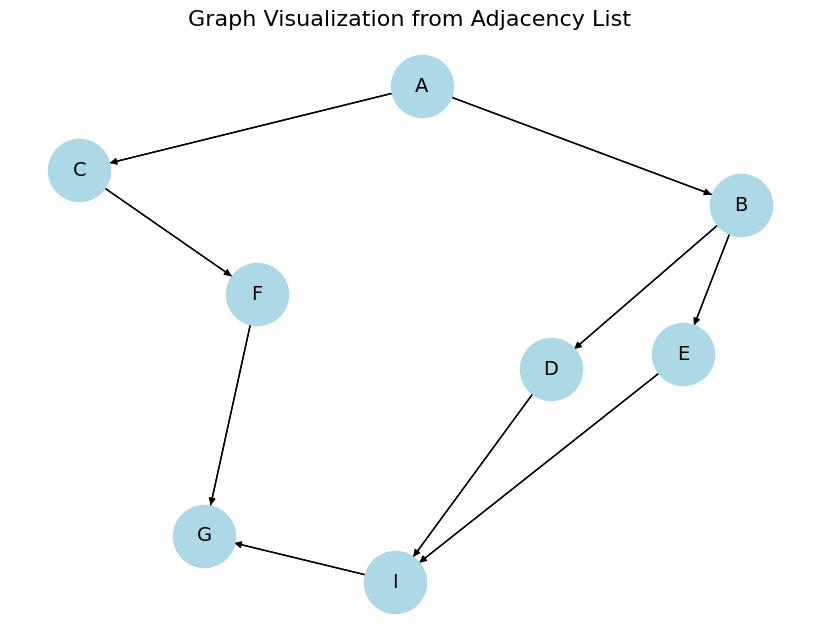

In [91]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph using a dictionary (adjacency list)
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': ['I'],
    'E': ['I'],
    'F': ['G'],
    'I': ['G'],
    'G': []
}

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Define layout
pos = nx.spring_layout(G, seed=42)  # For reproducibility

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=14, arrows=True)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
plt.title("Graph Visualization from Adjacency List", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

In [84]:
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': ['I'],
    'E': ['I'],
    'I': ['G'],
    'F': ['G'],
    'G': []
}


start = "A"
target = "G"

In [85]:
print(f"BFS from {start} to {target}:", bfs(graph, start, target))
print(f"DFS from {start} to {target}:", dfs(graph, start, target))

BFS from A to G: True
DFS from A to G: True


In [86]:
# BFS return shortest path
def bfs_shortest_path(graph, start, target):
    visited = set()
    queue = deque([start])
    parent = {start: None}

    while queue:
        node = queue.popleft()
        if node == target:
            # Reconstruct path from end to start
            path = []
            while node is not None:
                path.append(node)
                node = parent[node]
            return path[::-1]  # Reverse path

        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited and neighbor not in parent:
                parent[neighbor] = node
                queue.append(neighbor)

    return None  # No path found

#This DFS function returns all paths
def dfs_all_paths(graph, current, target, path=None, paths=None):
    if path is None:
        path = []
    if paths is None:
        paths = []

    path = path + [current]

    if current == target:
        paths.append(path)
        return paths

    for neighbor in graph[current]:
        if neighbor not in path:
            dfs_all_paths(graph, neighbor, target, path, paths)

    return paths



In [87]:
path = bfs_shortest_path(graph, start, target)
result = " -> ".join(path)
print(f"BFS shortest path from {start} to {target}:", result)

BFS shortest path from A to G: A -> C -> F -> G


In [88]:
paths = dfs_all_paths(graph, start, target)
result = [" -> ".join(path) for path in paths]
print("All DFS paths from A to F:", result)

All DFS paths from A to F: ['A -> B -> D -> I -> G', 'A -> B -> E -> I -> G', 'A -> C -> F -> G']
